<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/delivery.csv')
df.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


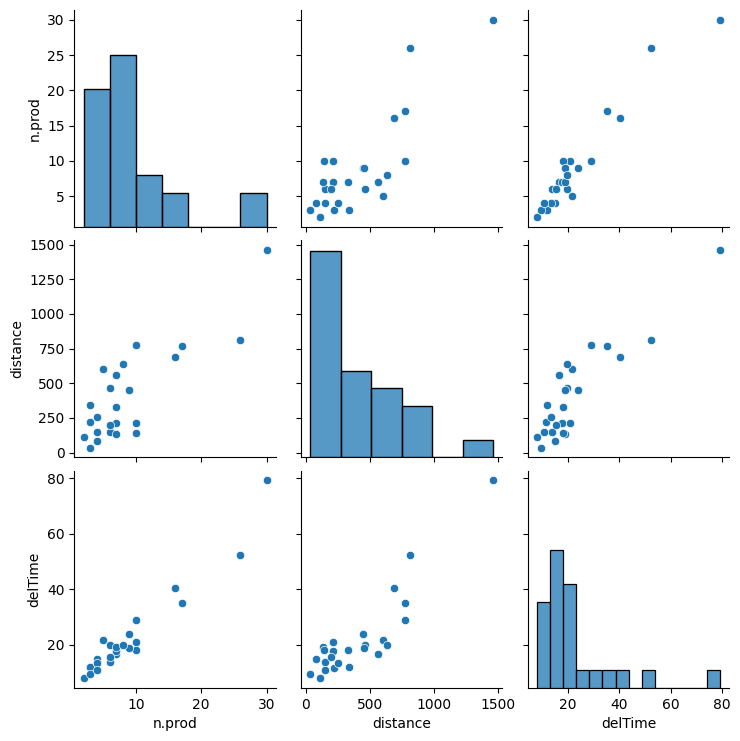

In [ ]:
sns.pairplot(df)

In [ ]:
corr_matrix=df.corr()
corr_matrix

,n.prod,distance,delTime
n.prod,1.000000,0.824215,0.964615
distance,0.824215,1.000000,0.891670
delTime,0.964615,0.891670,1.000000


<Axes: >

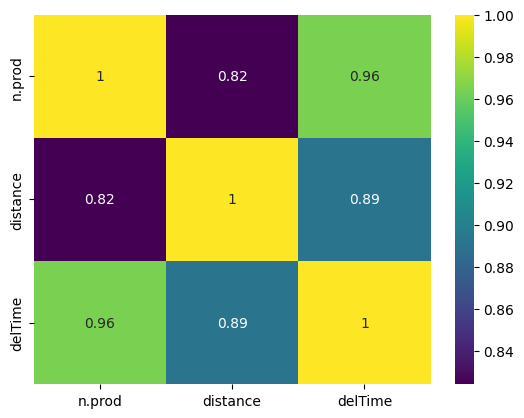

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [ ]:
X=df.drop(columns='delTime', axis=1)
Y=df[['delTime']]
linreg.fit(X,Y)

LinearRegression()

In [ ]:
print("Intercept: ", linreg.intercept_,"\nCoefficients: ", linreg.coef_)

Intercept:  [2.34123115] 
Coefficients:  [[1.61590721 0.01438483]]


In [ ]:
np.corrcoef(df['n.prod'], df['distance'])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [ ]:
linreg.score(X,Y)

0.9595937494832257

In [ ]:
#model with a single predictor
linreg1=LinearRegression()
features=df[['n.prod']]
target=df[['delTime']]
linreg1.fit(features, target)

LinearRegression()

In [ ]:
linreg1.score(features, target)

0.9304813135986856

In [ ]:
#model with a single predictor
linreg2=LinearRegression()
features=df[['distance']]
target=df[['delTime']]
linreg2.fit(features, target)

LinearRegression()

In [ ]:
linreg2.score(features, target)

0.7950755275911866

In [ ]:
#calculating Adjusted R_score
adjusted_rscore=1-(1-linreg.score(X,Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
adjusted_rscore

0.9559204539817008

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the vif for each attribute

vif=pd.Series([variance_inflation_factor(X.values, idx)
                for idx in range(X.shape[1])],
              index=X.columns)

print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64
